In [16]:
import geopandas as gpd
import folium
from statistics import mean

All_Blocks = gpd.read_file(r'GeoJSON Files/All_Blocks.geojson')
All_Boreholes = gpd.read_file(r'GeoJSON Files/All_Boreholes.geojson')


# calculate the center of map
bounds = All_Blocks.total_bounds
x = mean([bounds[0], bounds[2]])
y = mean([bounds[1], bounds[3]])
location = (y, x)

map1 = folium.Map(location=location,
                    zoom_start=11, control_scale=300, tiles=None)

    # Put ESRI Satellite for the layer map
tile = folium.TileLayer(
                        tiles='https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
                        attr='Esri',
                        name='Esri Satellite',
                        overlay=False,
                        control=False
                        ).add_to(map1)

map1

***GENERATE RANDOM SEISMIC DATA ON CSV FILE***

In [20]:
import pandas as pd
import numpy as np

# Define the well names
well_names = ['Well-1', 'Well-2', 'Well-3', 'Well-4', 'Well-5', 'Well-6']

# Define the seismic data properties
time = np.linspace(0, 100, 1000)
amplitude = np.random.randn(len(time))

# Create a dictionary to store the seismic data for each well
seismic_data = {}

# Loop through each well and generate seismic data
for well in well_names:
    # Generate a random phase shift for each well
    phase_shift = np.random.randint(0, 360)
    
    # Generate a random scaling factor for each well
    scaling_factor = np.random.uniform(0.5, 2.0)
    
    # Apply the phase shift and scaling factor to the seismic data
    seismic_trace = amplitude * scaling_factor * np.sin(2 * np.pi * time / 10 + np.deg2rad(phase_shift))
    
    # Store the seismic data in a Pandas DataFrame
    df = pd.DataFrame({'Time': time, 'Amplitude': seismic_trace})
    
    # Add well name and lithology to the DataFrame
    lithology = 'Sandstone' if well == 'Well-1' or well == 'Well-3' else 'Limestone' if well == 'Well-2' or well == 'Well-5' else 'Shale'
    df['Well'] = well
    df['Lithology'] = lithology
    
    # Add the seismic data to the dictionary
    seismic_data[well] = df

# Concatenate the seismic data for all wells into a single DataFrame
seismic_df = pd.concat(seismic_data.values(), ignore_index=True)

# Save the seismic data to a CSV file
seismic_df.to_csv('seismic_data.csv', index=False)


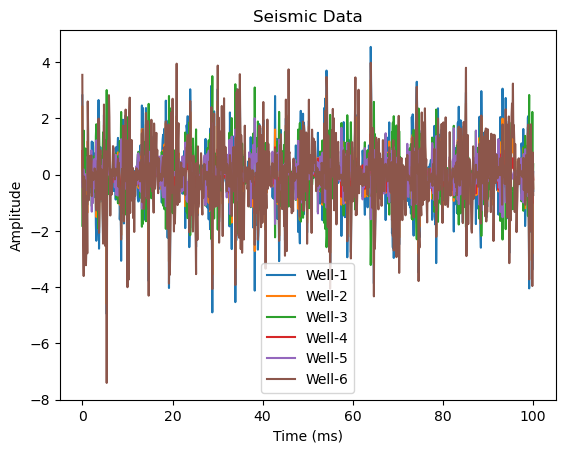

In [21]:
import matplotlib.pyplot as plt

# Loop through each well and plot the seismic data
for well in well_names:
    # Filter the seismic data for the current well
    well_data = seismic_df[seismic_df['Well'] == well]
    
    # Plot the seismic data
    plt.plot(well_data['Time'], well_data['Amplitude'], label=well)
    
# Add a legend and axis labels
plt.legend()
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title('Seismic Data')
plt.show()


***CREATE DUMMIES DATA OF WELL-LOG***

In [22]:
import numpy as np
import pandas as pd

# Set the number of data points and wells
num_points = 1000
num_wells = 6

# Set the lithology interpretation for each well
lithology = ['sandstone', 'limestone', 'sandstone', 'shale', 'limestone', 'shale']

# Set the depth range for the logs
depth_range = np.linspace(0, 10000, num_points)

# Create an empty DataFrame to store the well log data
well_logs = pd.DataFrame({'Depth': depth_range})

# Generate random well log data for each well
for i in range(num_wells):
    # Set the lithology for the current well
    lith = lithology[i]
    
    # Generate random well log data for the current well
    cali = np.random.normal(12, 2, num_points)
    rdep = np.random.normal(0.6, 0.2, num_points)
    gr = np.random.normal(50, 10, num_points)
    rhob = np.random.normal(2.5, 0.2, num_points)
    nphi = np.random.normal(0.3, 0.05, num_points)
    sp = np.random.normal(-10, 5, num_points)
    dtc = np.random.normal(100, 10, num_points)
    
    # Create a DataFrame for the well log data and add it to the main DataFrame
    log_data = pd.DataFrame({'CALI': cali, 'RDEP': rdep, 'GR': gr, 'RHOB': rhob, 'NPHI': nphi, 'SP': sp, 'DTC': dtc})
    well_logs = pd.concat([well_logs, log_data], axis=1)
    
    # Add a lithology column to the main DataFrame
    lith_column = pd.Series([lith]*num_points, name='Lithology')
    well_logs = pd.concat([well_logs, lith_column], axis=1)
    
    # Save the well log data for the current well as a CSV file
    file_name = f'well_{i+1}_log.csv'
    well_logs.to_csv(file_name, index=False)
    
    # Reset the well log DataFrame for the next well
    well_logs = pd.DataFrame({'Depth': depth_range})


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots

well_n_log = ['CSV Files/well_1_log.csv',
              'CSV Files/well_2_log.csv',
              'CSV Files/well_3_log.csv',
              'CSV Files/well_4_log.csv',
              'CSV Files/well_5_log.csv',
              'CSV Files/well_6_log.csv']

fig = make_subplots(rows=1, cols=7, shared_yaxes=True, horizontal_spacing=0.02)

# create definitions for wells
def make_wells():
    
    # Loop through each well log and plot the logs
    for i, log in enumerate(well_n_log):
        # Load the data
        data = pd.read_csv(log)
        
        # Add the logs to the plot
        fig.add_trace(go.Scatter(x=well_logs['GR'], y=well_logs['Depth'], name='GR', line=dict(color='blue')), row=1, col=1)
        fig.add_trace(go.Scatter(x=well_logs['CALI'], y=well_logs['Depth'], name='CALI', line=dict(color='red')), row=1, col=2)
        fig.add_trace(go.Scatter(x=well_logs['RDEP'], y=well_logs['Depth'], name='RDEP', line=dict(color='green')), row=1, col=3)
        fig.add_trace(go.Scatter(x=well_logs['RHOB'], y=well_logs['Depth'], name='RHOB', line=dict(color='purple')), row=1, col=4)
        fig.add_trace(go.Scatter(x=well_logs['NPHI'], y=well_logs['Depth'], name='NPHI', line=dict(color='orange')), row=1, col=5)
        fig.add_trace(go.Scatter(x=well_logs['SP'], y=well_logs['Depth'], name='SP', line=dict(color='black')), row=1, col=6)
        fig.add_trace(go.Scatter(x=well_logs['DTC'], y=well_logs['Depth'], name='DTC', line=dict(color='pink')), row=1, col=7)

    # Set the layout of the subplots grid
        fig.update_layout(height=800, width=1200, title='Well Logs', xaxis=dict(title='Value'), yaxis=dict(title='Depth'))
    
    return make_wells

fig.show()

    


# Show the plot

    

    

well 1 log

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import pandas as pd
import streamlit as st


# Load the well log data from the CSV file
well_logs = pd.read_csv('CSV Files/well_1_log.csv')

# Extract the depth and properties data
depth = well_logs['Depth']
cali = well_logs['CALI']
rdep = well_logs['RDEP']
gr = well_logs['GR']
rhob = well_logs['RHOB']
nphi = well_logs['NPHI']
sp = well_logs['SP']
dtc = well_logs['DTC']

# # Define the colors for each parameter
# colors = {
#     'CALI': 'blue',
#     'RDEP': 'green',
#     'GR': 'red',
#     'RHOB': 'black',
#     'NPHI': 'magenta',
#     'SP': 'cyan',
#     'DTC': 'orange'
# }

# # Create a plot of the well log data
# fig, axs = plt.subplots(nrows=1, ncols=7, sharey=True, figsize=(10, 10))
# axs[0].plot(cali, depth, color=colors['CALI'])
# axs[0].set_xlabel('CALI')
# axs[0].set_ylim(depth.max(), depth.min())
# axs[1].plot(rdep, depth, color=colors['RDEP'])
# axs[1].set_xlabel('RDEP')
# axs[2].plot(gr, depth, color=colors['GR'])
# axs[2].set_xlabel('GR')
# axs[3].plot(rhob, depth, color=colors['RHOB'])
# axs[3].set_xlabel('RHOB')
# axs[4].plot(nphi, depth, color=colors['NPHI'])
# axs[4].set_xlabel('NPHI')
# axs[5].plot(sp, depth, color=colors['SP'])
# axs[5].set_xlabel('SP')
# axs[6].plot(dtc, depth, color=colors['DTC'])
# axs[6].set_xlabel('DTC')
# axs[0].set_ylabel('Depth')

# plt.show()

# Create the figure
fig = go.Figure()

# Add the traces for each well log parameter
fig.add_trace(go.Scatter(x=cali, y=depth, name='CALI', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=rdep, y=depth, name='RDEP', line=dict(color='green')))
fig.add_trace(go.Scatter(x=gr, y=depth, name='GR', line=dict(color='red')))
fig.add_trace(go.Scatter(x=rhob, y=depth, name='RHOB', line=dict(color='black')))
fig.add_trace(go.Scatter(x=nphi, y=depth, name='NPHI', line=dict(color='magenta')))
fig.add_trace(go.Scatter(x=sp, y=depth, name='SP', line=dict(color='cyan')))
fig.add_trace(go.Scatter(x=dtc, y=depth, name='DTC', line=dict(color='orange')))

# Add the well log tracks
fig.update_layout(yaxis=dict(autorange='reversed', range=[0, 5000]),
                    xaxis=dict(title='Log Values'),
                    legend=dict(x=0, y=1, bgcolor='rgba(255,255,255,0.5)')
                    )

# Add the interactive cursor
fig.update_layout(hovermode='y',
                    hoverdistance=100,
                    spikedistance=1000)

# Show the figure
fig.show()

In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Load the well log data from the CSV file
well_logs = pd.read_csv('CSV Files/well_1_log.csv')

# Extract the depth and properties data
depth = well_logs['Depth']
cali = well_logs['CALI']
rdep = well_logs['RDEP']
gr = well_logs['GR']
rhob = well_logs['RHOB']
nphi = well_logs['NPHI']
sp = well_logs['SP']
dtc = well_logs['DTC']

# Create the subplots grid with one row and multiple columns
fig = make_subplots(rows=1, cols=7, shared_yaxes=True)

# Add each well log parameter as a separate trace in its own subplot
fig.add_trace(go.Scatter(x=well_logs['GR'], y=well_logs['Depth'],name='GR', line=dict(color='blue')), row=1, col=1)
fig.add_trace(go.Scatter(x=well_logs['CALI'], y=well_logs['Depth'], name='CALI', line=dict(color='red')), row=1, col=2)
fig.add_trace(go.Scatter(x=well_logs['RDEP'], y=well_logs['Depth'], name='RDEP', line=dict(color='green')), row=1, col=3)
fig.add_trace(go.Scatter(x=well_logs['RHOB'], y=well_logs['Depth'], name='RHOB', line=dict(color='purple')), row=1, col=4)
fig.add_trace(go.Scatter(x=well_logs['NPHI'], y=well_logs['Depth'], name='NPHI', line=dict(color='orange')), row=1, col=5)
fig.add_trace(go.Scatter(x=well_logs['SP'], y=well_logs['Depth'], name='SP', line=dict(color='black')), row=1, col=6)
fig.add_trace(go.Scatter(x=well_logs['DTC'], y=well_logs['Depth'], name='DTC', line=dict(color='pink')), row=1, col=7)

# Set the layout of the subplots grid
fig.update_layout(height=800, width=1200, title='Well Logs', xaxis=dict(title='Value'), yaxis=dict(title='Depth', autorange='reversed'))

# Show the figure
fig.show()


well 2 log

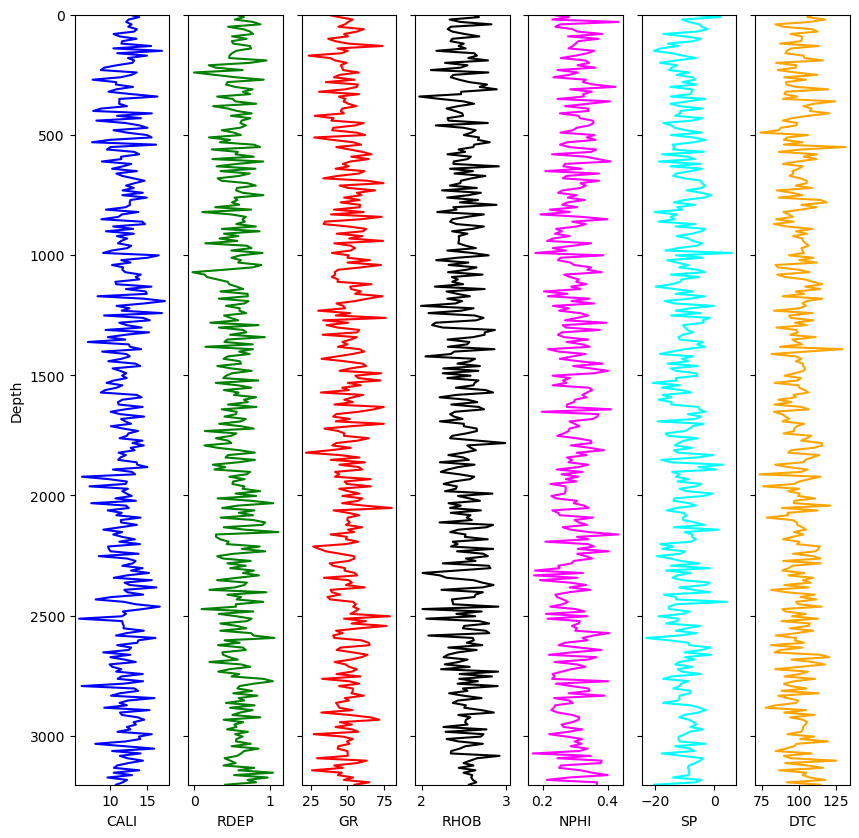

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the well log data from the CSV file
well_logs = pd.read_csv('CSV Files/well_2_log.csv')

# Extract the depth and properties data
depth = well_logs['Depth']
cali = well_logs['CALI']
rdep = well_logs['RDEP']
gr = well_logs['GR']
rhob = well_logs['RHOB']
nphi = well_logs['NPHI']
sp = well_logs['SP']
dtc = well_logs['DTC']

# Define the colors for each parameter
colors = {
    'CALI': 'blue',
    'RDEP': 'green',
    'GR': 'red',
    'RHOB': 'black',
    'NPHI': 'magenta',
    'SP': 'cyan',
    'DTC': 'orange'
}

# Create a plot of the well log data
fig, axs = plt.subplots(nrows=1, ncols=7, sharey=True, figsize=(10, 10))
axs[0].plot(cali, depth, color=colors['CALI'])
axs[0].set_xlabel('CALI')
axs[0].set_ylim(depth.max(), depth.min())
axs[1].plot(rdep, depth, color=colors['RDEP'])
axs[1].set_xlabel('RDEP')
axs[2].plot(gr, depth, color=colors['GR'])
axs[2].set_xlabel('GR')
axs[3].plot(rhob, depth, color=colors['RHOB'])
axs[3].set_xlabel('RHOB')
axs[4].plot(nphi, depth, color=colors['NPHI'])
axs[4].set_xlabel('NPHI')
axs[5].plot(sp, depth, color=colors['SP'])
axs[5].set_xlabel('SP')
axs[6].plot(dtc, depth, color=colors['DTC'])
axs[6].set_xlabel('DTC')
axs[0].set_ylabel('Depth')

plt.show()


well 3 log

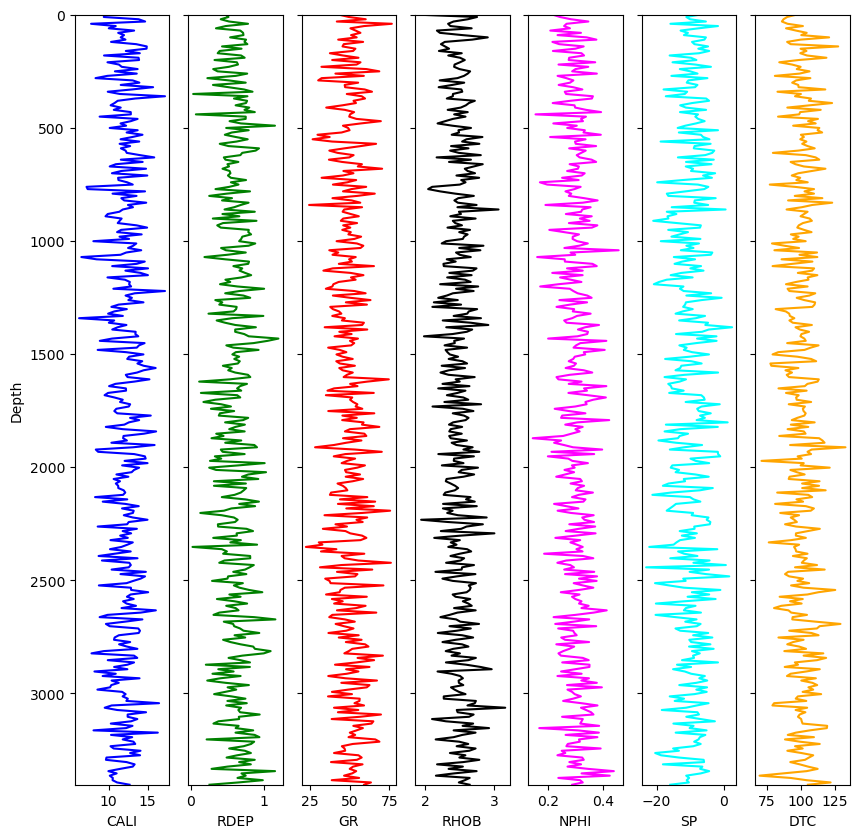

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the well log data from the CSV file
well_logs = pd.read_csv('CSV Files/well_3_log.csv')

# Extract the depth and properties data
depth = well_logs['Depth']
cali = well_logs['CALI']
rdep = well_logs['RDEP']
gr = well_logs['GR']
rhob = well_logs['RHOB']
nphi = well_logs['NPHI']
sp = well_logs['SP']
dtc = well_logs['DTC']

# Define the colors for each parameter
colors = {
    'CALI': 'blue',
    'RDEP': 'green',
    'GR': 'red',
    'RHOB': 'black',
    'NPHI': 'magenta',
    'SP': 'cyan',
    'DTC': 'orange'
}

# Create a plot of the well log data
fig, axs = plt.subplots(nrows=1, ncols=7, sharey=True, figsize=(10, 10))
axs[0].plot(cali, depth, color=colors['CALI'])
axs[0].set_xlabel('CALI')
axs[0].set_ylim(depth.max(), depth.min())
axs[1].plot(rdep, depth, color=colors['RDEP'])
axs[1].set_xlabel('RDEP')
axs[2].plot(gr, depth, color=colors['GR'])
axs[2].set_xlabel('GR')
axs[3].plot(rhob, depth, color=colors['RHOB'])
axs[3].set_xlabel('RHOB')
axs[4].plot(nphi, depth, color=colors['NPHI'])
axs[4].set_xlabel('NPHI')
axs[5].plot(sp, depth, color=colors['SP'])
axs[5].set_xlabel('SP')
axs[6].plot(dtc, depth, color=colors['DTC'])
axs[6].set_xlabel('DTC')
axs[0].set_ylabel('Depth')

plt.show()


well 4 log

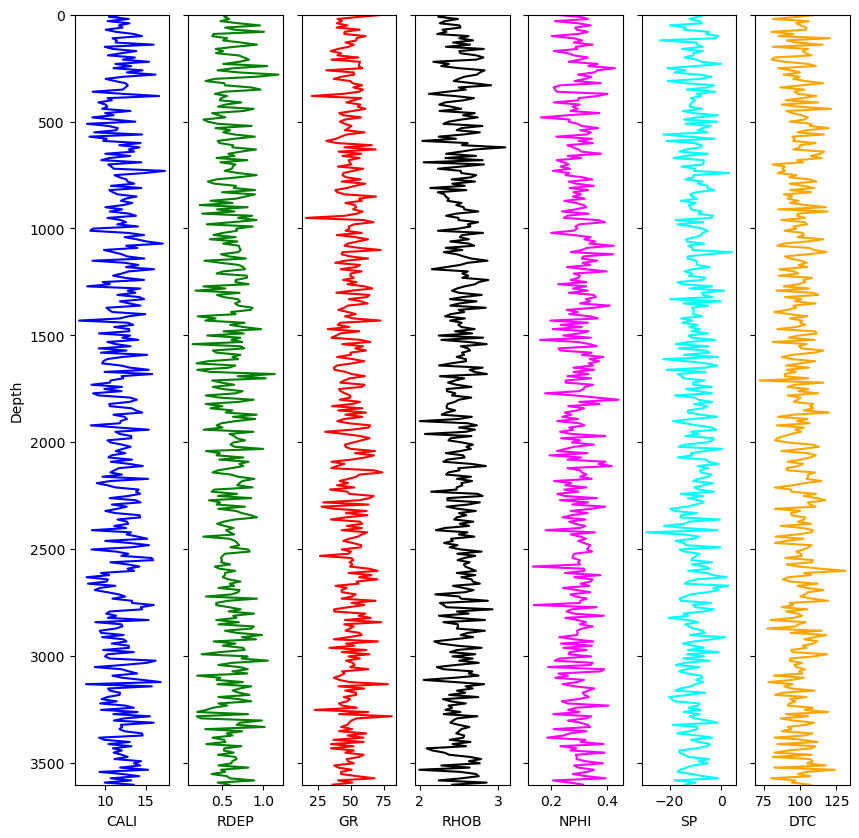

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the well log data from the CSV file
well_logs = pd.read_csv('CSV Files/well_4_log.csv')

# Extract the depth and properties data
depth = well_logs['Depth']
cali = well_logs['CALI']
rdep = well_logs['RDEP']
gr = well_logs['GR']
rhob = well_logs['RHOB']
nphi = well_logs['NPHI']
sp = well_logs['SP']
dtc = well_logs['DTC']

# Define the colors for each parameter
colors = {
    'CALI': 'blue',
    'RDEP': 'green',
    'GR': 'red',
    'RHOB': 'black',
    'NPHI': 'magenta',
    'SP': 'cyan',
    'DTC': 'orange'
}

# Create a plot of the well log data
fig, axs = plt.subplots(nrows=1, ncols=7, sharey=True, figsize=(10, 10))
axs[0].plot(cali, depth, color=colors['CALI'])
axs[0].set_xlabel('CALI')
axs[0].set_ylim(depth.max(), depth.min())
axs[1].plot(rdep, depth, color=colors['RDEP'])
axs[1].set_xlabel('RDEP')
axs[2].plot(gr, depth, color=colors['GR'])
axs[2].set_xlabel('GR')
axs[3].plot(rhob, depth, color=colors['RHOB'])
axs[3].set_xlabel('RHOB')
axs[4].plot(nphi, depth, color=colors['NPHI'])
axs[4].set_xlabel('NPHI')
axs[5].plot(sp, depth, color=colors['SP'])
axs[5].set_xlabel('SP')
axs[6].plot(dtc, depth, color=colors['DTC'])
axs[6].set_xlabel('DTC')
axs[0].set_ylabel('Depth')

plt.show()


well 5 log

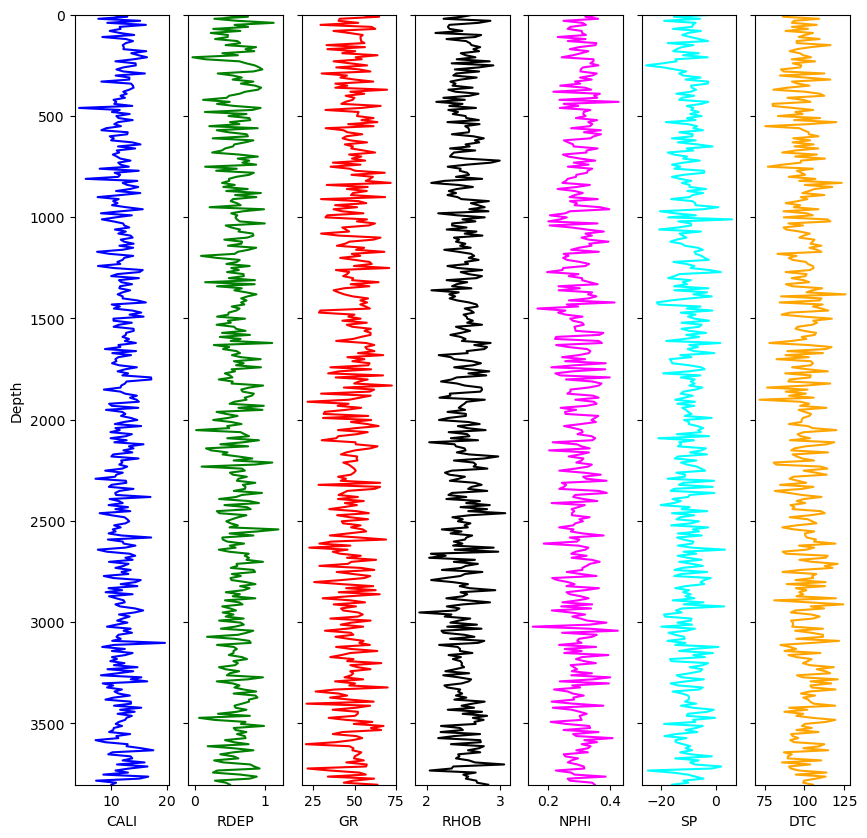

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the well log data from the CSV file
well_logs = pd.read_csv('CSV Files/well_5_log.csv')

# Extract the depth and properties data
depth = well_logs['Depth']
cali = well_logs['CALI']
rdep = well_logs['RDEP']
gr = well_logs['GR']
rhob = well_logs['RHOB']
nphi = well_logs['NPHI']
sp = well_logs['SP']
dtc = well_logs['DTC']

# Define the colors for each parameter
colors = {
    'CALI': 'blue',
    'RDEP': 'green',
    'GR': 'red',
    'RHOB': 'black',
    'NPHI': 'magenta',
    'SP': 'cyan',
    'DTC': 'orange'
}

# Create a plot of the well log data
fig, axs = plt.subplots(nrows=1, ncols=7, sharey=True, figsize=(10, 10))
axs[0].plot(cali, depth, color=colors['CALI'])
axs[0].set_xlabel('CALI')
axs[0].set_ylim(depth.max(), depth.min())
axs[1].plot(rdep, depth, color=colors['RDEP'])
axs[1].set_xlabel('RDEP')
axs[2].plot(gr, depth, color=colors['GR'])
axs[2].set_xlabel('GR')
axs[3].plot(rhob, depth, color=colors['RHOB'])
axs[3].set_xlabel('RHOB')
axs[4].plot(nphi, depth, color=colors['NPHI'])
axs[4].set_xlabel('NPHI')
axs[5].plot(sp, depth, color=colors['SP'])
axs[5].set_xlabel('SP')
axs[6].plot(dtc, depth, color=colors['DTC'])
axs[6].set_xlabel('DTC')
axs[0].set_ylabel('Depth')

plt.show()


well 6 log

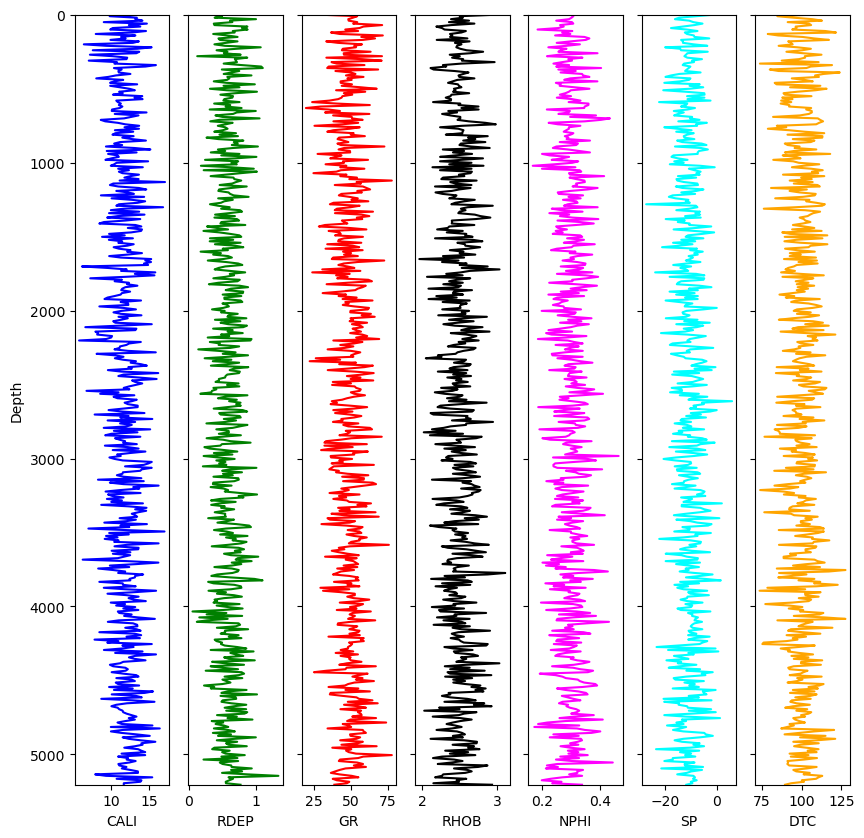

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the well log data from the CSV file
well_logs = pd.read_csv('CSV Files/well_6_log.csv')

# Extract the depth and properties data
depth = well_logs['Depth']
cali = well_logs['CALI']
rdep = well_logs['RDEP']
gr = well_logs['GR']
rhob = well_logs['RHOB']
nphi = well_logs['NPHI']
sp = well_logs['SP']
dtc = well_logs['DTC']

# Define the colors for each parameter
colors = {
    'CALI': 'blue',
    'RDEP': 'green',
    'GR': 'red',
    'RHOB': 'black',
    'NPHI': 'magenta',
    'SP': 'cyan',
    'DTC': 'orange'
}

# Create a plot of the well log data
fig, axs = plt.subplots(nrows=1, ncols=7, sharey=True, figsize=(10, 10))
axs[0].plot(cali, depth, color=colors['CALI'])
axs[0].set_xlabel('CALI')
axs[0].set_ylim(depth.max(), depth.min())
axs[1].plot(rdep, depth, color=colors['RDEP'])
axs[1].set_xlabel('RDEP')
axs[2].plot(gr, depth, color=colors['GR'])
axs[2].set_xlabel('GR')
axs[3].plot(rhob, depth, color=colors['RHOB'])
axs[3].set_xlabel('RHOB')
axs[4].plot(nphi, depth, color=colors['NPHI'])
axs[4].set_xlabel('NPHI')
axs[5].plot(sp, depth, color=colors['SP'])
axs[5].set_xlabel('SP')
axs[6].plot(dtc, depth, color=colors['DTC'])
axs[6].set_xlabel('DTC')
axs[0].set_ylabel('Depth')

plt.show()


In [17]:
import rasterio

src = rasterio.open('TIF Files\BATNAS_NORTH_ACEH_gy.tif')
src2 = rasterio.open('TIF Files\BATNAS_SOUTH_ACEH_gy.tif')

src.bounds

BoundingBox(left=95.0, bottom=5.0, right=100.0, top=10.0)

In [18]:
src2.bounds

BoundingBox(left=95.0, bottom=0.0, right=100.0, top=5.0)

In [19]:
import geopandas as gpd
import folium
from statistics import mean
from folium.plugins import FloatImage
from folium import LinearColormap, LayerControl

All_Blocks = gpd.read_file(r'GeoJSON Files/All_Blocks.geojson')
All_Boreholes = gpd.read_file(r'GeoJSON Files/All_Boreholes.geojson')


# calculate the center of map
bounds = All_Blocks.total_bounds
x = mean([bounds[0], bounds[2]])
y = mean([bounds[1], bounds[3]])
location = (y, x)

map1 = folium.Map(location=location,
                        zoom_start=11, control_scale=300, tiles=None)


# Add the raster to the map as a TileLayer
dem = folium.raster_layers.ImageOverlay(
                        "TIF Files\BATNAS_NORTH_ACEH.png",
                        name='BATNAS_NORTH_ACEH',
                        bounds=[[5, 95], [10, 100]],
                        opacity=0.7,
                        interactive=True,
                        cross_origin=False,
                        # colormap=lambda x: (1, 1, 1, x)
                        ).add_to(map1)

dem2 = folium.raster_layers.ImageOverlay(
                        "TIF Files\BATNAS_SOUTH_ACEH.png",
                        name='BATNAS_SOUTH_ACEH',
                        bounds=[[0, 95], [5, 100]],
                        opacity=0.7,
                        interactive=True,
                        cross_origin=False,
                        # colormap=lambda x: (1, 1, 1, x)
                        ).add_to(map1)

tile = folium.TileLayer(
                        tiles='https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
                        attr='Esri',
                        name='Esri Satellite',
                        overlay=True,
                        control=False
                        ).add_to(map1)

# Create a color bar legend and add it to the map
legend = LinearColormap(
                        ['blue', 'cyan', 'green', 'yellow', 'red'],  # List of colors in the color map
                        vmin=-3156,  # Minimum elevation value in your image
                        vmax=2277,  # Maximum elevation value in your image
                        caption='Elevation',  # Label for the color bar
                        ).add_to(map1)

legend.caption = 'Elevation'


# Define a JavaScript callback function to show or hide the legend
if dem is not None:
    # Add the colormap legend to the map
    legend.add_to(map1)

    # Add the image overlay to the map
    dem.add_to(map1)

    # Add a layer control to the map, with the image overlay as a named layer
    folium.LayerControl({'DEM': dem}).add_to(map1)
    
# layer_control = folium.LayerControl(
#                         position='topleft',
#                         collapsed=False).add_to(map1)

# color_map = LinearColormap(
#     ['blue', 'green', 'yellow', 'red'],  # List of colors in the color map
#     vmin=-3156,  # Minimum elevation value in your image
#     vmax=2277,  # Maximum elevation value in your image
# )

# color_map.caption = 'Elevation'
# # Add the color map legend to the map
# legend = FloatImage(
#                     color_map._repr_html_(), 
#                     bottom=75, left=75,
#                     ).add_to(map1)
# Display the map
map1

TypeError: Object of type ImageOverlay is not JSON serializable

In [ ]:
import folium
print(folium.__version__)


0.14.0


In [ ]:
src.bounds

BoundingBox(left=95.0, bottom=4.99999999999999, right=100.00000000000001, top=10.0)

In [ ]:
import folium
import rasterio
import numpy as np


src = rasterio.open('TIF Files\BATNAS_NORTH_ACEH_gy.tif')

with rasterio.open('your_raster_file.tif') as src:
    elevation = src.read(1)
    
m = folium.Map(location=[latitude, longitude], zoom_start=10)


# Add the raster layer to the map
colormap = {'rainbow': ['#FF0000', '#FFFF00', '#00FF00', '#00FFFF', '#0000FF']}
raster_layers.ImageOverlay(
    image=elevation,
    name='DEM',
    colormap=colormap,
    bounds=src.bounds,
    origin='upper'
).add_to(m)

# Add a layer control to the map
folium.LayerControl().add_to(m)

m

TypeError: 'list' object is not callable

In [ ]:
import streamlit as st
import folium
from folium.plugins import MarkerCluster
from streamlit_folium import folium_static
import geopandas as gpd
import sys
import os


# Load your data (world map, blocks, wells)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
blocks = gpd.read_file('GeoJSON Files\All_Blocks.geojson')
wells = gpd.read_file('GeoJSON Files\All_Boreholes.geojson')


if '__file__' not in globals():
    sys.path.append(os.getcwd())
    
# Create the map object
@st.cache(hash_funcs={type(os): id}, allow_output_mutation=True)
def create_map():
    m = folium.Map(location=[0, 0], zoom_start=2)

    # Create the tile layers for the map
    folium.TileLayer('OpenStreetMap').add_to(m)
    folium.TileLayer('Stamen Terrain').add_to(m)
    folium.TileLayer('Stamen Toner').add_to(m)

    # Create the layer control for the map
    layers_control = folium.LayerControl().add_to(m)

    # Add the world map layer to the map
    folium.GeoJson(world).add_to(m)

    # Create the marker clusters for the blocks and wells layers
    block_cluster = MarkerCluster().add_to(m)
    well_cluster = MarkerCluster().add_to(m)

    # Add the blocks and wells layers to the marker clusters
    blocks_layer = folium.GeoJson(blocks, name='Blocks', show=False)
    wells_layer = folium.GeoJson(wells, name='Wells', show=False)

    for _, row in blocks.iterrows():
        folium.Marker(
            location=[row.geometry.y, row.geometry.x],
            popup=row['Block_Name'],
        ).add_to(block_cluster)

    for _, row in wells.iterrows():
        folium.Marker(
            location=[row.geometry.y, row.geometry.x],
            popup=row['Borehole_I'],
        ).add_to(well_cluster)

    # Add the blocks and wells layers to the layer control
    layers_control.add_child(blocks_layer)
    layers_control.add_child(wells_layer)

    # Return the map object
    return m

# Create the filters for the blocks and wells layers
block_filter = st.sidebar.multiselect(
    'Select blocks:',
    blocks['Block_Name'].unique(),
)

well_filter = st.sidebar.multiselect(
    'Select wells:',
    wells['Borehole_I'].unique(),
)

# Get the filtered data
filtered_blocks = blocks[blocks['Block_Name'].isin(block_filter)]
filtered_wells = wells[wells['Borehole_I'].isin(well_filter)]

# Create the map object
m = create_map()

# Update the layers based on the filters
blocks_layer = m.get_layer(name='Blocks')
blocks_layer.data = filtered_blocks.to_json()
blocks_layer.show = bool(block_filter)

wells_layer = m.get_layer(name='Wells')
wells_layer.data = filtered_wells.to_json()
wells_layer.show = bool(well_filter)

# Display the map object
folium_static(m)

InternalHashError: module '__main__' has no attribute '__file__'

While caching the body of `create_map()`, Streamlit encountered an
object of type `builtins.function`, which it does not know how to hash.

**In this specific case, it's very likely you found a Streamlit bug so please
[file a bug report here.]
(https://github.com/streamlit/streamlit/issues/new/choose)**

In the meantime, you can try bypassing this error by registering a custom
hash function via the `hash_funcs` keyword in @st.cache(). For example:

```
@st.cache(hash_funcs={builtins.function: my_hash_func})
def my_func(...):
    ...
```

If you don't know where the object of type `builtins.function` is coming
from, try looking at the hash chain below for an object that you do recognize,
then pass that to `hash_funcs` instead:

```
Object of type builtins.function: <function create_map at 0x000001D8403C71F0>
```

Please see the `hash_funcs` [documentation](https://docs.streamlit.io/library/advanced-features/caching#the-hash_funcs-parameter)
for more details.
            

In [ ]:
import streamlit as st
import folium
import geopandas as gpd
from folium.plugins import MarkerCluster
import os
import inspect

@st.cache(hash_funcs={type(os): lambda _: None, type(inspect): lambda _: None})
def create_map():
    m = folium.Map(location=[0, 0], zoom_start=2)

    # Create the tile layers for the map
    folium.TileLayer('OpenStreetMap').add_to(m)
    folium.TileLayer('Stamen Terrain').add_to(m)
    folium.TileLayer('Stamen Toner').add_to(m)

    # Create the layer control for the map
    layers_control = folium.LayerControl().add_to(m)

    # Add the world map layer to the map
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    folium.GeoJson(world).add_to(m)

    # Create the marker clusters for the blocks and wells layers
    block_cluster = MarkerCluster().add_to(m)
    well_cluster = MarkerCluster().add_to(m)

    # Add the blocks and wells layers to the marker clusters
    blocks = gpd.read_file('GeoJSON Files\All_Blocks.geojson')
    wells = gpd.read_file('GeoJSON Files\All_Boreholes.geojson')
    blocks_layer = folium.GeoJson(blocks, name='Blocks', show=False)
    wells_layer = folium.GeoJson(wells, name='Wells', show=False)

    for _, row in blocks.iterrows():
        folium.Marker(
            location=[row.geometry.y, row.geometry.x],
            popup=row['Block_Name'],
        ).add_to(block_cluster)

    for _, row in wells.iterrows():
        folium.Marker(
            location=[row.geometry.y, row.geometry.x],
            popup=row['Borehole_I'],
        ).add_to(well_cluster)

    # Add the blocks and wells layers to the layer control
    layers_control.add_child(blocks_layer)
    layers_control.add_child(wells_layer)

    # Return the map object
    return m

# Create the map
map = create_map()

# Render the map using streamlit
folium_static(map)

InternalHashError: module '__main__' has no attribute '__file__'

While caching the body of `create_map()`, Streamlit encountered an
object of type `builtins.function`, which it does not know how to hash.

**In this specific case, it's very likely you found a Streamlit bug so please
[file a bug report here.]
(https://github.com/streamlit/streamlit/issues/new/choose)**

In the meantime, you can try bypassing this error by registering a custom
hash function via the `hash_funcs` keyword in @st.cache(). For example:

```
@st.cache(hash_funcs={builtins.function: my_hash_func})
def my_func(...):
    ...
```

If you don't know where the object of type `builtins.function` is coming
from, try looking at the hash chain below for an object that you do recognize,
then pass that to `hash_funcs` instead:

```
Object of type builtins.function: <function create_map at 0x000001D840431310>
```

Please see the `hash_funcs` [documentation](https://docs.streamlit.io/library/advanced-features/caching#the-hash_funcs-parameter)
for more details.
            

In [32]:
# Basic libraries
import pandas as pd
import numpy as np
import os
import glob
from statistics import mean

# Map libraries
import folium
from folium import plugins, LinearColormap
from folium.plugins import Search, FloatImage
import geopandas as gpd
import branca

# Plotting libraries
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

# Streamlit libraries
import streamlit as st
from streamlit_folium import folium_static
import streamlit_nested_layout


# Dataset
All_Blocks = gpd.read_file(r'GeoJSON Files/All_Blocks.geojson')
All_Boreholes = gpd.read_file(r'GeoJSON Files/All_Boreholes.geojson')
All_Well_Logs = pd.read_csv('CSV Files/well_all_log.csv', sep = ';')

All_Well_Logs.info()

# # Extract the depth and properties data
# borehole_id = All_Well_Logs['Borehole_I']
# depth = All_Well_Logs['Depth']
# cali = All_Well_Logs['CALI']
# rdep = All_Well_Logs['RDEP']
# gr = All_Well_Logs['GR']
# rhob = All_Well_Logs['RHOB']
# nphi = All_Well_Logs['NPHI']
# sp = All_Well_Logs['SP']
# dtc = All_Well_Logs['DTC']



# well_2_log = All_Well_Logs[All_Well_Logs['Borehole_I'] == 'BC-002']


# fig = make_subplots(rows=1, cols=7, shared_yaxes=True)

# # Add each well log parameter as a separate trace in its own subplot
# fig.add_trace(go.Scatter(x=well_2_log['GR'], y=well_2_log['Depth'],name='GR', line=dict(color='blue')), row=1, col=1)
# fig.add_trace(go.Scatter(x=well_2_log['CALI'], y=well_2_log['Depth'], name='CALI', line=dict(color='red')), row=1, col=2)
# fig.add_trace(go.Scatter(x=well_2_log['RDEP'], y=well_2_log['Depth'], name='RDEP', line=dict(color='green')), row=1, col=3)
# fig.add_trace(go.Scatter(x=well_2_log['RHOB'], y=well_2_log['Depth'], name='RHOB', line=dict(color='purple')), row=1, col=4)
# fig.add_trace(go.Scatter(x=well_2_log['NPHI'], y=well_2_log['Depth'], name='NPHI', line=dict(color='orange')), row=1, col=5)
# fig.add_trace(go.Scatter(x=well_2_log['SP'], y=well_2_log['Depth'], name='SP', line=dict(color='black')), row=1, col=6)
# fig.add_trace(go.Scatter(x=well_2_log['DTC'], y=well_2_log['Depth'], name='DTC', line=dict(color='pink')), row=1, col=7)

# # Set the layout of the subplots grid
# fig.update_layout(height=800, width=1200, title='Well Logs', xaxis=dict(title='Value'), yaxis=dict(title='Depth', autorange='reversed'))

# # Show the figure
# fig.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226 entries, 0 to 2225
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Borehole_I  2226 non-null   object 
 1   Depth       2226 non-null   float64
 2   CALI        2226 non-null   float64
 3   RDEP        2226 non-null   float64
 4   GR          2226 non-null   float64
 5   RHOB        2226 non-null   float64
 6   NPHI        2226 non-null   float64
 7   SP          2226 non-null   float64
 8   DTC         2226 non-null   float64
 9   Lithology   2226 non-null   object 
dtypes: float64(8), object(2)
memory usage: 174.0+ KB


InternalHashError: module '__main__' has no attribute '__file__'

While caching the body of `create_map()`, Streamlit encountered an
object of type `builtins.function`, which it does not know how to hash.

**In this specific case, it's very likely you found a Streamlit bug so please
[file a bug report here.]
(https://github.com/streamlit/streamlit/issues/new/choose)**

In the meantime, you can try bypassing this error by registering a custom
hash function via the `hash_funcs` keyword in @st.cache(). For example:

```
@st.cache(hash_funcs={builtins.function: my_hash_func})
def my_func(...):
    ...
```

If you don't know where the object of type `builtins.function` is coming
from, try looking at the hash chain below for an object that you do recognize,
then pass that to `hash_funcs` instead:

```
Object of type builtins.function: <function create_map at 0x0000012D57803AF0>
```

Please see the `hash_funcs` [documentation](https://docs.streamlit.io/library/advanced-features/caching#the-hash_funcs-parameter)
for more details.
            